# Projecto:


# Detección de fraude en tarjetas de crédito 


# Problemática

Una compañia financiera quiere encontrar los patrones en los fraudes de las tarjetas de crédito que se encuentran en su compañia, ya que estan ocacionando gastos terribles y necesitan encontrar el problema. En ese sentido, el equipo de ciencia de datos esta encargado de encontrar un modelo idodeo para verificar estos fraudes.

## 1.Introducción

El autoenconder es una especie de arquitecturas de aprendizaje profundo. La arquitectura del codificador automatico comprende dos subsistemas como codificador y decodificador. Ambos subsistemas estan formados por una red neuronal independiente con un conkunto definido de capas y funciones de activación. El rasgo carasteristico fundamental de la arquitectura Autenconder es extraer los puntos de los datos latentes (ocultos) del conunto de datos dados.

Como siguiere el nombre, el codificador automatico tiene como objetivo aprender a codificar una represebtacuón de datos de muestra de entrenamiento automaticamente sin intervencion humana

El autocodificador se usa ampliamente para la reducción de dimensionalidad y eliminación de datos

## 2. Construcción de un autoenconder

La construcción de un codificador automático normalmente tendrá tres elementos:
1. Función de codificación para mapear la entrada a una representación oculta a través de una función no lineal, $z = sigmoid(W x + b)$
2. Una función de decodificación como $x = sigmoidea(W'y + b′)$, que se mapeará de nuevo en la reconstrucción $x'$con la misma forma que x
3. Una función de pérdida, que es una función de distancia para medir la pérdida de información entre la representación comprimida de datos y la representación
descomprimida. El error de reconstrucción se puede medir utilizando el error cuadrado tradicional $||x-z||^2$
Simple

## 3.Elegir las funciones de activación adecuadas


¿Cuál es la elección más adecuada para una red neural?
Quizás se pregunte cómo elegir la función de activación adecuada para sus redes neuronales. A continuación, se ofrecen respuestas detalladas sobre cuándo elegir
una función de activación en particular:
* Lineal: $f(z) = z$. Puede interpretar esto como una función de no activación. Por lo general, lo usamos en la capa de salida en redes de regresión, ya que no
necesitamos ninguna transformación en las salidas.
* Sigmoide (logística): transforma la salida de una capa en un rango entre 0 y 1. Puede interpretarlo como la probabilidad de una predicción de salida. Por lo
tanto, lo usamos generalmente en la capa de salida en redes de clasificación binaria. Además de eso, a veces lo usamos en capas ocultas. Sin embargo, cabe
señalar que la función sigmoidea es monótona pero su derivada no lo es. Por lo tanto, la red neuronal puede atascarse en una solución suboptima.
* Softmax:. softmax es una función logística generalizada que se utiliza para la clasificación multiclase. Por lo tanto, lo usamos en la capa de salida en redes de
clasificación multiclase.
* Tanh: es una mejor versión de la función sigmoidea con gradientes más fuertes. Como puede ver en los gráficos, las derivadas de la función tanh son más
pronunciadas que las de la función sigmoidea. Tiene un rango de -1 a 1. Es común usar la función tanh en capas ocultas.
* ReLU: es probablemente la función de activación más utilizada en la actualidad. Es el "predeterminado" en capas ocultas en redes feedforward. Su rango es de 0
a infinito, y tanto la función en sí como su derivada son monótonas. Un inconveniente de la función ReLU es la incapacidad de mapear adecuadamente la parte
negativa de la entrada donde todas las entradas negativas se transforman a cero. Para solucionar el problema del "negativo moribundo" en ReLU, se inventó eaky ReLU para introducir una pequeña pendiente en la parte negativa. Cuando $z < 0, f(z) = az$, donde a suele ser un valor pequeño, como 0,01.


## 4.Transacciones con tarjeta de crédito y dataset


El conjunto de datos que usaremos en este cuaderno es creditcard.csv, que básicamente era una transacción con tarjeta de crédito en el pasado. Mediante un
sistema codificador-decodificador encontraremos los puntos de datos ocultos y aplicaremos un clasificador lineal para detectar las transacciones de tarjetas de
crédito Fraude (1) o Genuine / no fraude (0).

### Paso 1: Importar las librerias iniciales

In [47]:
#Manipulación de datos
import pandas as pd
import numpy as np
import os
# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#SKLearn related libraries
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [48]:
# Metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [127]:
#Keras NN related libraries
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

### Paso 2: Cargar la base de datos

In [50]:
# Cargar el conjunto de datos en un Pandas DataFrame
card_df = pd.read_csv('creditcard.csv', header=0)

In [51]:
# Primeras 5 filas del conjunto de datos
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
# Información del conjunto de datos
card_df.info()
print("===="*30)
card_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
# Comprobación del número de valores que faltan en cada columna
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##  Análisis Exploratorio de Datos

1. Visualizando estadisticas descriptiva de los datos

In [55]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [56]:
#Etiquetas de la clase o target
print(f"Las clases únicas en el conjunto de datos son : {np.unique(card_df['Class'])}")

Las clases únicas en el conjunto de datos son : [0 1]


In [58]:
# Distribución de transacciones legítimas y transacciones fraudulentas
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class'>

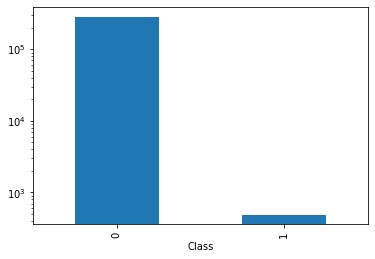

In [59]:
#Graficamos la distribución de los datos
card_df.groupby('Class')['Class'].count().plot.bar(logy=True)

Encontramos dos divisiones de transacciones normales y fraudulentas

0 --> Transacción normal

1 --> Transacción fraudulentaa

In [60]:
# Separar los datos para el análisis
legit = card_df[card_df.Class == 0]
fraud = card_df[card_df.Class == 1]

In [61]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


## Transformación


La transformación de datos es uno de los pasos del procesamiento de datos. Necesitamos transformar el valor de ciertos atributos para que tenga sentido en el
análisis posterior.

In [62]:
# Cambiar la variable time a dias
card_df['Time'] = card_df['Time'].apply(lambda t: (t/3600) % 24)
 

In [63]:
# Muestra de la data
#normal_trans = card_df[card_df[ 'class'] == 0]. sample (frac=0.5)
normal_trans = card_df[card_df['Class']==0].sample(4000)
fraud_trans = card_df [card_df ['Class'] == 1]


In [64]:
reduced_set = normal_trans.append(fraud_trans).reset_index(drop=True)

C:\Users\enriq\AppData\Local\Temp\ipykernel_13916\4007564440.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_set = normal_trans.append(fraud_trans).reset_index(drop=True)


In [65]:
print(f"Forma limpiada del conjunto de datos: {reduced_set.shape}")


Forma limpiada del conjunto de datos: (4492, 31)


## Split del Dataset

In [105]:
# Splitting the dataset into x and y features
y = reduced_set['Class']
X = reduced_set.drop('Class', axis=1)

In [106]:
print(f"Shape of Features: {X.shape} and Target: {y.shape}")


Shape of Features: (4492, 30) and Target: (4492,)


## Visualice los datos con t-SNE


TNSE (incrustación de vecinos estocásticos distribuidos en t) es uno de los métodos de reducción de dimensionalidad distintos de PCA y SVD. Esto suprimirá algo
de ruido y acelerará el cálculo de la distancia por pares entre muestras.

In [107]:
def dimensionality_plot(X, y):
    sns.set(style='whitegrid', palette='muted')

In [108]:
# Initializing TSNE object with 2 principal components
tsne = TSNE(n_components=2, random_state = 42)

In [ ]:
# Fitting the data
X_trans = tsne.fit_transform(X)

plt.figure(figsize=(12,8))

plt.scatter(X_trans[np.where(y == 0), 0], X_trans[np.where(y==0), 1],marker='o', color='g', linewidths=1, alpha=0.8, label='Normal')
plt.scatter(X_trans[np.where(y == 1), 0], X_trans[np.where(y==1), 1], marker='o', color='k', linewidths=1, alpha=0.8, label='Fraud')

plt.legend (loc = 'best')


In [110]:
#Graficando las dimensionalidad
dimensionality_plot(X, y)

## Construcción de Modelo Autoencoder.


In [112]:
print(f"Forma de los datos de entrada: {X.shape[1]}")

Forma de los datos de entrada: 30


Definimos el modelo autoencoder. Como necesitamos acceder a la salida de la etapa del encoder, necesitaremos definir el modelo utilizando un método
ligeramente diferente al utilizado anteriormente. Defina una capa de entrada de 30 unidades:

In [123]:
#Capa de entrada con forma de los features / columnas del conjunto de datos
input_layer = Input(shape = (X.shape[1], ))


Defina una Dense layer posterior de 100 unidades respectivamente y una función de activación de tanh como etapa de codificación. Tenga en cuenta que hemos
asignado el layer a una variable y pasado la capa anterior a un método de llamada para la clase:

In [131]:
#construcción del enconder network
encoded = Dense(100, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation= 'relu')(encoded)


In [138]:
#Decoder network
decoded = Dense(12, activation='tanh')(encoded)
decoded = Dense(25, activation='tanh')(decoded)
decoded = Dense(50, activation='tanh')(decoded)
decoded = Dense(100, activation='tanh')(decoded)

output_layer = Dense(X.shape[1], activation='relu')(decoded)

# Building a model
auto_encoder = Model(input_layer, output_layer)
#Compile the auto encoder model
auto_encoder.compile(optimizer='Adadelta', loss='mse')


## Normalize and Scale the features


In [145]:
scaler = RobustScaler().fit_transform(X)

# Scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

In [146]:
# Compile the auto encoder model
auto_encoder.compile(optimizer='adadelta', loss='mse')

# Training the auto encoder model
auto_encoder.fit(X_scaled_normal, X_scaled_normal, batch_size=32, epochs=20, shuffle=True, validation_split=0.20)

Epoch 1/20
100/100 [==============================] - 2s 5ms/step - loss: 1.2821 - val_loss: 1.5613
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2816 - val_loss: 1.5608
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2811 - val_loss: 1.5604
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 1.2806 - val_loss: 1.5599
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2801 - val_loss: 1.5594
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2796 - val_loss: 1.5590
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2791 - val_loss: 1.5585
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2786 - val_loss: 1.5581
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2782 - val_loss: 1.5577
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2777 - val_loss: 1.5572

## Using Autoencode to encode data

In [157]:
latent_model = Sequential()
latent_model.add(auto_encoder.layers[0])
latent_model.add(auto_encoder.layers[1])
latent_model.add(auto_encoder.layers[2])
latent_model.add(auto_encoder.layers[3])
latent_model.add(auto_encoder.layers[4])

In [158]:
normal_tran_points = latent_model.predict(X_scaled_normal)
fraud_tran_points = latent_model.predict(X_scaled_fraud)
# Making as a one collection
encoded_X = np.append(normal_tran_points, fraud_tran_points, axis=0)
y_normal = np.zeros(normal_tran_points.shape[0])
y_fraud = np.ones(fraud_tran_points.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)


16/16 [==============================] - 0s 1ms/step


# Calling TSNE plot function
dimensionality_plot(encoded_X, encoded_y)

We can observe that the encoded fraud data points have been moved towards one cluster, whereas there are only few fraud transaction datapoints are there among the normal transaction data points. 

## Split into Train and Test

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(encoded_X, encoded_y, test_size=0.3)

## Non-linear Classifier

In [160]:
# Instance of SVM
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_predictions = svc_clf.predict(X_test)

In [161]:
print("Classification report \n {0}".format(classification_report(y_test, svc_predictions)))

Classification report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1188
           1       1.00      0.50      0.67       160

    accuracy                           0.94      1348
   macro avg       0.97      0.75      0.82      1348
weighted avg       0.94      0.94      0.93      1348



## Linear Classifier

Now let's apply linear classifier to classify the data and observe the result. We will use **Logistic Regression** to build the model.

In [163]:
lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)

# Predict the Test data
predictions = lr_clf.predict(X_enc_test)

In [164]:
print("Classification report \n {0}".format(classification_report(y_enc_test, predictions)))


Classification report 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1198
         1.0       0.98      0.72      0.83       150

    accuracy                           0.97      1348
   macro avg       0.97      0.86      0.91      1348
weighted avg       0.97      0.97      0.97      1348



In [165]:
print("Accuracy score is : {:.2f}".format(accuracy_score(y_enc_test, predictions)))

Accuracy score is : 0.97


## Conclusion

In this analysis, we have found that Support Vector Machine classifier is able to classify the data upto **93%** without encoding and decoding. However, the effect of autoencoder comes when the data gets transformed from non-linear to linearly separable then linear classifier like **Logistic Regression** could perform in a better way.

The accuracy score of Logistic Regression can go upto **97%**, this is something not happens too often in logistic algorithm. 